### Bank Institution Term Deposit Predictive Model

Bank Institution Term Deposit Predictive Model 
is a project I found interesting. Its main objective is to build a model that predicts the customers that would or would not subscribe to bank term deposits, and this article aims at sharing my step by step approach of building the model.

### Contents
* The Data
* Exploratory Data Analysis
* Data Preprocessing
* Machine Learning Model
* Comparing Results
* Prediction
* Conclusion

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [3]:
df=pd.read_csv('bank-additional-full.csv',sep=';')
df.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Exploratory Data Analysis (EDA)
EDA is an essential part of machine learning model development because it helps us in understanding our data and extract useful insights that will help in feature engineering. 

In [4]:
# function to check the shape of a dataset
def data_shape(data):
    print('shape:',data.shape)
# function to check the size of a dataset
def data_size(data):
    print('size:',data.size)
# Getting the shape of the dataset
data_shape(df)
# Getting the size of the dataset
data_size(df)

shape: (41188, 21)
size: 864948


In [5]:
# function to ckeck the information of a dataset
def data_info(data):
    print('information:')
    print('---------------------------------------------')
    print(data.info())
    print('---------------------------------------------')
# Getting the information of the dataset
data_info(df)

information:
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  4

In [6]:
# Getting the statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Unique and missing values


In [7]:
# function to get all unique values in the categorical variables
def unique_val(df):
    cols=df.columns
    for i in cols :
        if df[i].dtype=='O':
            print('Unique values in',i,'are',df[i].unique())
            print('----------------------------------------------')
# Getting the unique values in the categorical columns
unique_val(df)

Unique values in job are ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------------------------
Unique values in marital are ['married' 'single' 'divorced' 'unknown']
----------------------------------------------
Unique values in education are ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------------------------
Unique values in default are ['no' 'unknown' 'yes']
----------------------------------------------
Unique values in housing are ['no' 'yes' 'unknown']
----------------------------------------------
Unique values in loan are ['no' 'yes' 'unknown']
----------------------------------------------
Unique values in contact are ['telephone' 'cellular']
----------------------------------------------
Unique values in month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'm

* ### Missing Values

In [8]:
# function to check for missing values
def miss_val(df):
    print('Sum of missing values in')
    print('------------------------------')
    print(df.isnull().sum())
    print('------------------------------')
miss_val(df)

Sum of missing values in
------------------------------
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
------------------------------


In [9]:
# Categorical variables
cat_data = df.select_dtypes(exclude='number')
# Numerical variables
num_data = df.select_dtypes(include='number')
print("Numeric data :\n ",num_data.head() )
print("Category data :\n ",cat_data.head() )


Numeric data :
     age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0  
Category data :
           job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services 

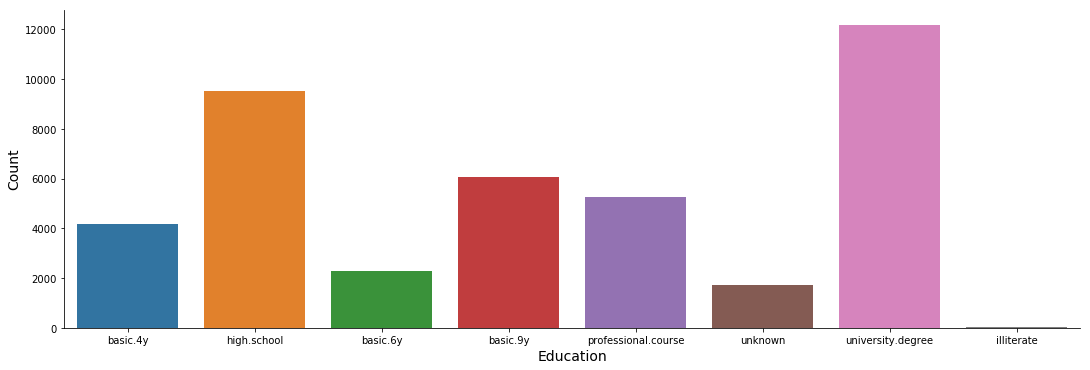

In [10]:
sns.catplot( x='education',kind="count", data=df, height=5, aspect=3)
plt.xlabel("Education", size=14)
plt.ylabel("Count", size=14);

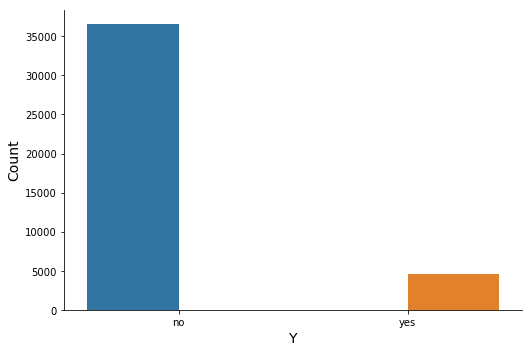

In [11]:
sns.catplot( x='y',kind="count", hue="y",  height=5, aspect=1.5, data=df)
plt.xlabel("Y", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

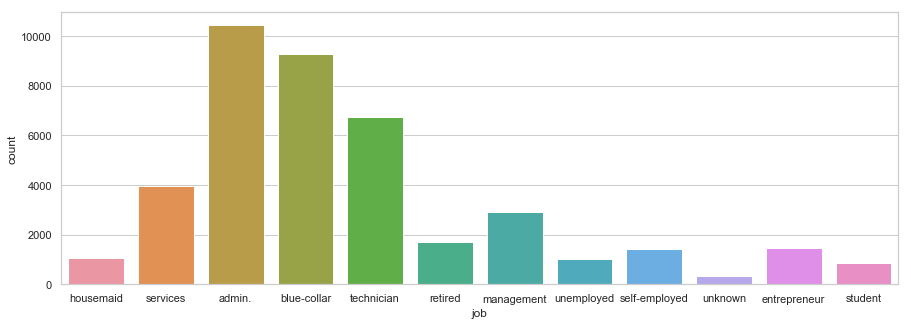

In [12]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
ax = sns.countplot(x="job", data=df)

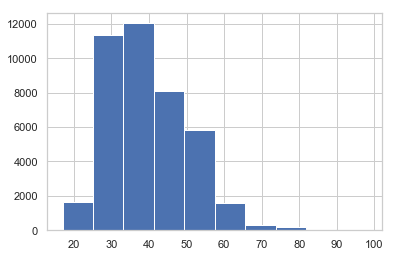

In [13]:
df.age.hist();

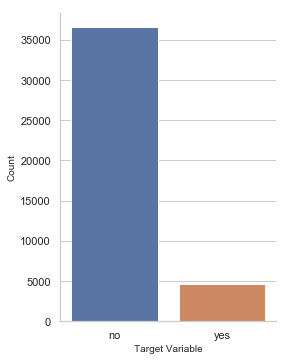

In [14]:
sns.catplot( x='y',kind="count", data=df, height=5, aspect=0.8)
plt.xlabel("Target Variable", size=10)
plt.ylabel("Count", size=10);

In [15]:
pd.crosstab(df.housing,df.y)

y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


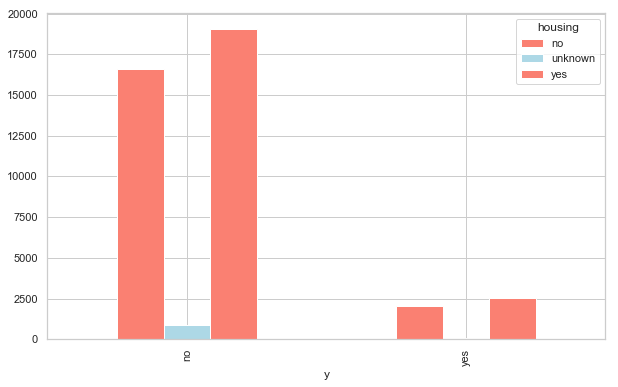

In [16]:
# Create a plot
pd.crosstab(df.y, df.housing).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

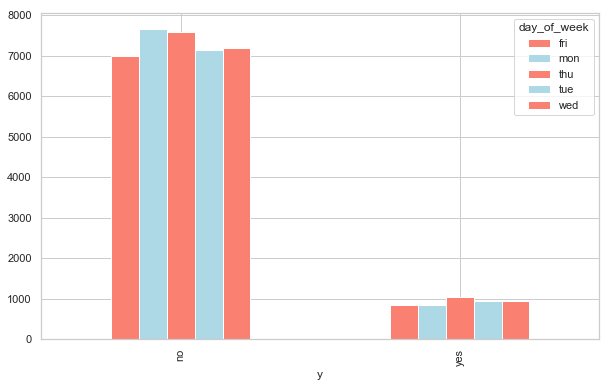

In [17]:
# Create a plot
pd.crosstab(df.y, df.day_of_week).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

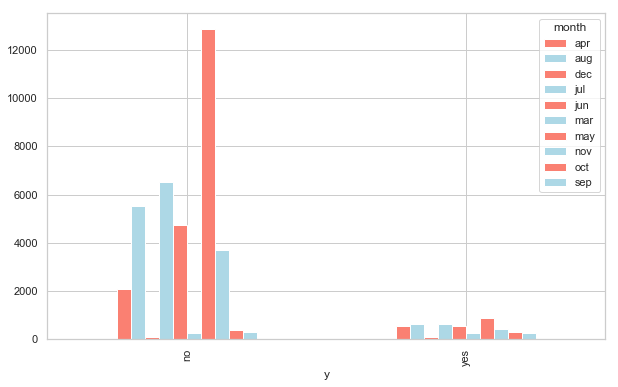

In [18]:
# Create a plot
pd.crosstab(df.y, df.month).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

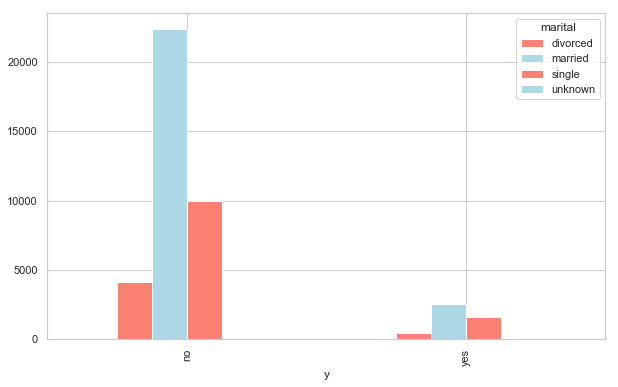

In [19]:
# Create a plot
pd.crosstab(df.y, df.marital).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

In [20]:
df.corr

<bound method DataFrame.corr of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

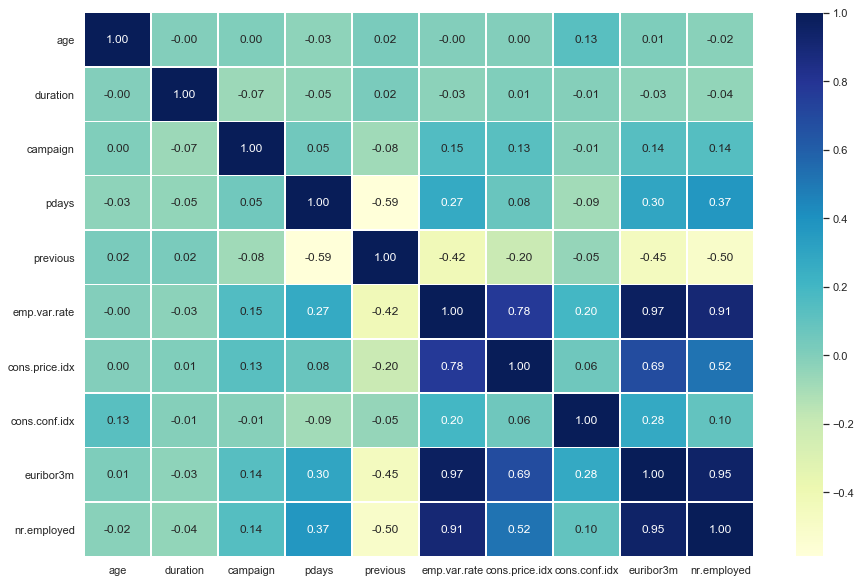

In [21]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

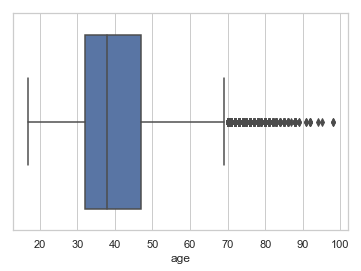

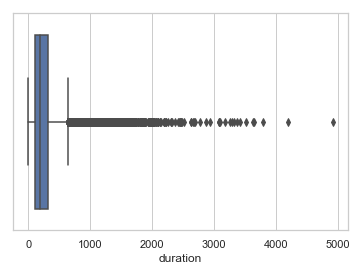

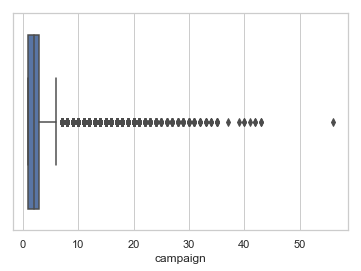

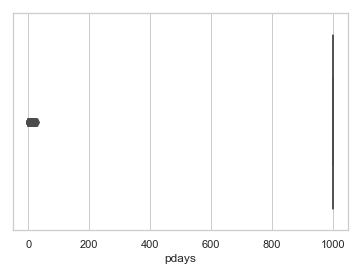

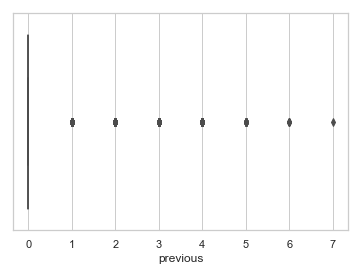

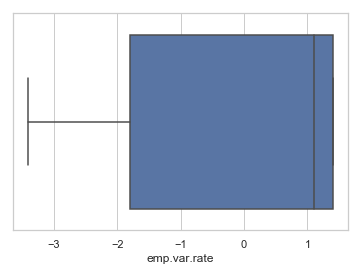

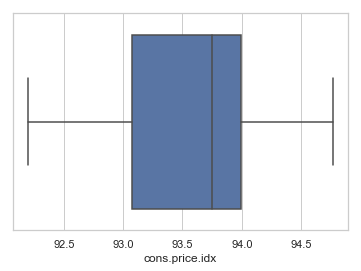

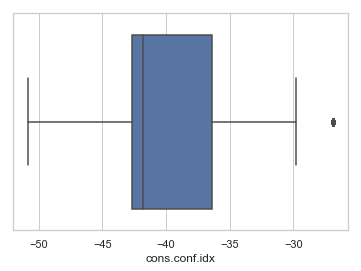

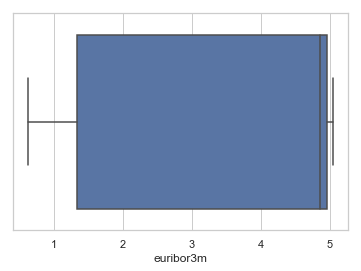

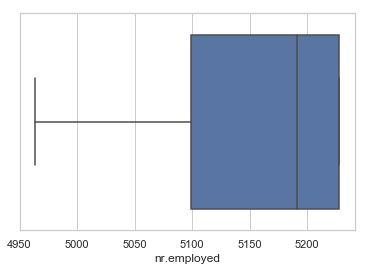

In [22]:
# Using boxplot to identify outliers
for col in num_data:
    ax = sns.boxplot(num_data[col])
    plt.show()

In [23]:
# Copying the dataset to a new df to handle outliers
df_tmp = df.copy(deep=True)
df_tmp.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
# treating outliers
count = 1
for col in num_data:
    Q1 = num_data[col].quantile(0.25)
    Q3 = num_data[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f'column {count}: {num_data[col].name}\n------------------------')
    print('1st quantile => ',Q1)
    print('3rd quantile => ',Q3)
    print('IQR =>',IQR)

    fence_low  = Q1-(1.5*IQR)
    print('fence_low => ' + str(fence_low))

    fence_high = Q3+(1.5*IQR)
    print('fence_high => ' + str(fence_high))
    print("\n------------------------")
    
    count = count + 1
    
    #replacing outliers with nan
    df_tmp[col][((df_tmp[col] < fence_low) |(df_tmp[col] > fence_high))] = np.nan

column 1: age
------------------------
1st quantile =>  32.0
3rd quantile =>  47.0
IQR => 15.0
fence_low => 9.5
fence_high => 69.5

------------------------
column 2: duration
------------------------
1st quantile =>  102.0
3rd quantile =>  319.0
IQR => 217.0
fence_low => -223.5
fence_high => 644.5

------------------------
column 3: campaign
------------------------
1st quantile =>  1.0
3rd quantile =>  3.0
IQR => 2.0
fence_low => -2.0
fence_high => 6.0

------------------------
column 4: pdays
------------------------
1st quantile =>  999.0
3rd quantile =>  999.0
IQR => 0.0
fence_low => 999.0
fence_high => 999.0

------------------------
column 5: previous
------------------------
1st quantile =>  0.0
3rd quantile =>  0.0
IQR => 0.0
fence_low => 0.0
fence_high => 0.0

------------------------
column 6: emp.var.rate
------------------------
1st quantile =>  -1.8
3rd quantile =>  1.4
IQR => 3.2
fence_low => -6.6000000000000005
fence_high => 6.200000000000001

------------------------
c

In [25]:
# checking the columns which outliers were replace with nan
print(df_tmp.select_dtypes(include='number').isnull().sum())


age                469
duration          2963
campaign          2406
pdays             1515
previous          5625
emp.var.rate         0
cons.price.idx       0
cons.conf.idx      447
euribor3m            0
nr.employed          0
dtype: int64


In [26]:
# Dealing with the nan values

# median
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label].fillna(df_tmp[label].median(),inplace=True)
    


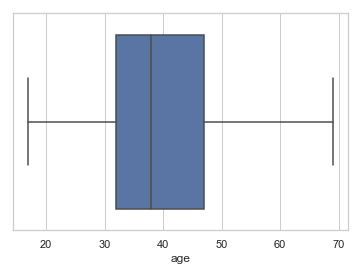

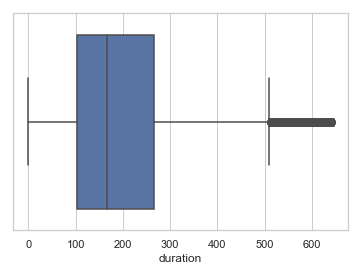

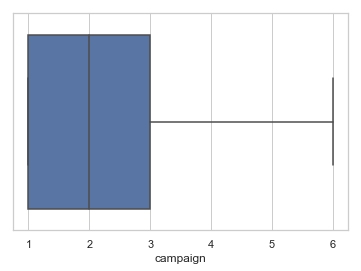

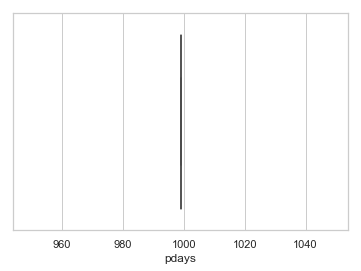

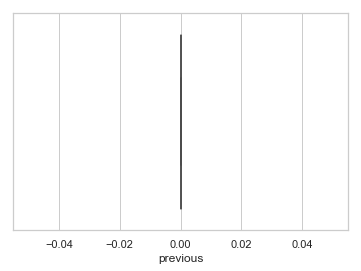

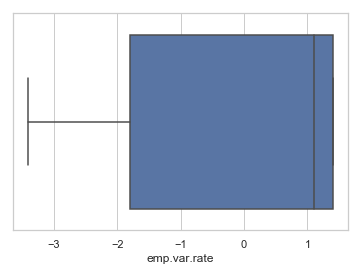

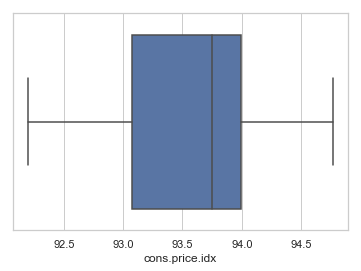

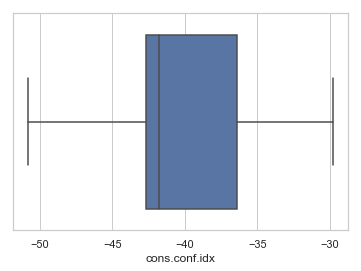

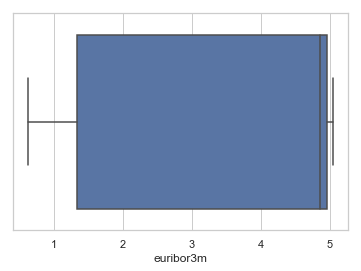

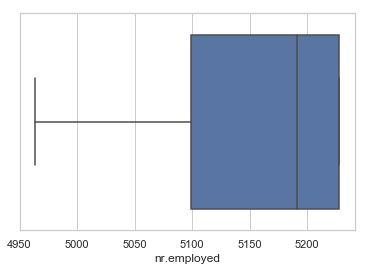

In [27]:
# Checking if outliers has been removed
for col in df_tmp.select_dtypes(include='number'):
    ax = sns.boxplot(df_tmp.select_dtypes(include='number')[col])
    plt.show()

In [28]:
# Exporting the dataset without outliers as csv
df_tmp.to_csv('bank-addition-full-without-outliers.csv', index=False)

In the course of the EDA, I found out that our target variable ‘y’ — has the client subscribed to a term deposit? (binary: ‘yes’,’no’), is highly imbalanced and that can affect our prediction model

### Data Preprocessing
When building a machine learning model, it is important to preprocess the data to have an efficient model.


In [29]:
# create list containing categorical columns
cat_cols=[]
num_cols=[]
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        cat_cols.append(label)
    else:
        num_cols.append(label)
        
        


In [30]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [31]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

* ### Encoding Categorical columns
Machine learning algorithms only read numerical values, which is why we need to change our categorical values to numerical values. I made use of pandas get_dummies method and type-casting to one-hot encode the columns.

In [32]:
from sklearn.preprocessing import StandardScaler

# function to encode categorical columns
def encode( data):
    cat_var_enc = pd.get_dummies(data[cat_cols], drop_first=False)
    return cat_var_enc
    
    # function to 
def preprocessed(data):
    # adding the encoded columns to the dataframe
    data = pd.concat([data, encode(data)], axis=1)
    # saving the column names of categorical variables
    cat_cols_all = list(encode(data).columns)
    # creating a new dataframe with features and output
    cols_input = num_cols + cat_cols_all
    preprocessed_data = data[cols_input + ['subscribed']]
    return preprocessed_data
    
# function to rescale numerical columns
def rescale(data):
    # creating an instance of the scaler object
    scaler = StandardScaler()
    data[num_cols] = scaler.fit_transform(data[num_cols])
    return data
    

In [33]:
df_new=pd.read_csv('bank-addition-full-without-outliers.csv')
df_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [34]:
# Preprocessing - Using the new dataset i.e. data without outliers
# replacing basic.4y, basic.6y, basic.9y as basic
df_new['education'] = df_new['education'].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic')

# defining output variable for classification
df_new['subscribed'] = (df_new.y == 'yes').astype('int')

In [35]:
# encoding categorical columns
encoded_data = encode(df_new)
print("Encoded Data\n-------------------------")
print(encoded_data.head())

# preprocessed data
preprocessed_data = preprocessed(df_new)
print("Preprocessed Data\n-------------------------")
print(preprocessed_data.head())

# rescaling numerical columns
preprocessed_data = rescale(preprocessed_data)
print("Rescaled Data\n-------------------------")
print(preprocessed_data.head())

Encoded Data
-------------------------
   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              1   
1           0                0                 0              0   
2           0                0                 0              0   
3           1                0                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             1            0   
2               0            0                  0             1            0   
3               0            0                  0             0            0   
4               0            0                  0             1            0   

   job_technician  ...  day_of_week_fri  day_of_week_mon  day_of_week_thu  \


In [36]:
#get the dependent and independent variable
X = preprocessed_data.drop(columns=[ "subscribed", 'duration'])
y = preprocessed_data["subscribed"]
print("X shape:",X.shape)
print("y shape:",y.shape)


X shape: (41188, 62)
y shape: (41188,)


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=1)
# printing the shape of training set
print(f'Train set X shape: {X_train.shape}')
print(f'Train set y shape: {y_train.shape}')
# printing the shape of test set
print(f'Test set X shape: {X_test.shape}')
print(f'Test set y shape: {y_test.shape}')


Train set X shape: (37069, 62)
Train set y shape: (37069,)
Test set X shape: (4119, 62)
Test set y shape: (4119,)


In [38]:
from sklearn.decomposition import PCA

def pca(data):
    # create an instance of pca
    pca = PCA()
    # fit pca to our data
    pca.fit(data)
    # saving the explained variance ratio
    explained = pca.explained_variance_ratio_
    # plot the cumulative variance explained by total number of components
    plt.figure(figsize=(12,6))
    plt.plot(range(1,61), explained.cumsum(), marker='o', linestyle='--')
    plt.title('Explained Variance by Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cummulative Explained Variance')
    plt.savefig('pca.png')
    plt.show()

In [ ]:
#!pip install imbalanced-learn

In [47]:
from sklearn.manifold import TSNE

# import library for dealing with class imbalance
from imblearn.over_sampling import SMOTE

In [48]:
# function to reduce dimensions
def dimension_reduction(method, components, train_data, test_data):
    # PCA
    if (method == 'PCA'):
        pca = PCA(n_components=components)
        pca.fit(train_data)
        pca_train = pca.transform(train_data)
        X_train_reduced = pd.DataFrame(pca_train)
        print("original shape:   ", train_data.shape)
        print("transformed shape:", X_train_reduced.shape)
        print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
        # applying method transform to X_test
        pca_test = pca.transform(test_data)
        X_test_reduced = pd.DataFrame(pca_test)
        
    # TSNE
    elif (method == 'TSNE'):
        tsne = TSNE(n_components=components)
        tsne_train = tsne.fit_transform(train_data)
        X_train_reduced = pd.DataFrame(tsne_train)
        print("original shape:   ", train_data.shape)
        print("transformed shape:", X_train_reduced.shape)
        # applying method transform to X_test
        tsne_test = tsne.fit_transform(test_data)
        X_test_reduced = pd.DataFrame(tsne_test)
    
    else:
        print('Dimensionality reduction method not found!')
        
    return X_train_reduced, X_test_reduced

# function to deal with imbalanced class
def class_imbalance(X_data, y_data):
    # creating an instance
    sm = SMOTE(random_state=27)
    # applying it to the data
    X_train_smote, y_train_smote = sm.fit_sample(X_data, y_data)
    return X_train_smote, y_train_smote


In [49]:
# dimensionality reduction
X_train_reduced, X_test_reduced = dimension_reduction('PCA', 20, X_train, X_test)

# dealing with imbalanced class
X_train_smote, y_train_smote = class_imbalance(X_train_reduced, y_train)

original shape:    (37069, 62)
transformed shape: (37069, 20)
Explained variation per principal component: [0.29482759 0.08954408 0.07957393 0.07396993 0.05902179 0.0375317
 0.0368305  0.0256481  0.02407068 0.0216276  0.02085342 0.02055103
 0.01866654 0.0162497  0.01585629 0.01534041 0.01516172 0.01401122
 0.01268884 0.01141146]


### Building an evaluation function


In [50]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

### Model choices

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [51]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [52]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.9606700655498908, 'Logistic Regression': 1.0, 'Random Forest': 1.0}

Beautiful! Since our models are fitting, let's compare them visually.

## Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

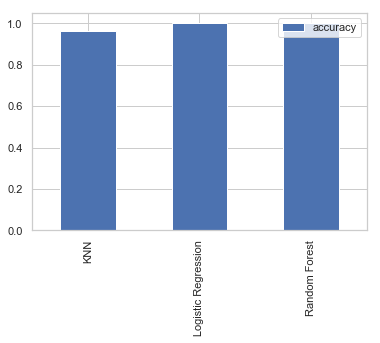

In [53]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Looking at the graph, `n_neighbors = 11` seems best.

Even knowing this, the `KNN`'s model performance didn't get near what `LogisticRegression` or the `RandomForestClassifier` did.

Because of this, we'll discard `KNN` and focus on the other two.

We've tuned `KNN` by hand but let's see how we can `LogisticsRegression` and `RandomForestClassifier` using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Instead of us having to manually try different hyperparameters by hand, `RandomizedSearchCV` tries a number of different combinations, evaluates them and saves the best.

### Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Reading the Scikit-Learn documentation for [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV), we find there's a number of different hyperparameters we can tune.

The same for [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [54]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [55]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.5s finished


In [56]:
rs_log_reg.score(X_test, y_test)

1.0

In [57]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.004832930238571752}

Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [58]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.9min finished


In [59]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [60]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

1.0

In [61]:
y_preds=rs_rf.predict(X_test)

In [72]:
y_test.iloc[1]

0

In [73]:

# Count the number of correct predictions
n_correct = 0
for i in range(len(y_test)):
    if y_preds[i] == y_test.iloc[i]:
        n_correct += 1


In [81]:
n_correct,len(y_test)

(4119, 4119)

## Evaluating a classification model, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:
* ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Luckily, Scikit-Learn has these all built-in.

To access them, we'll have to use our model to make predictions on the test set. You can make predictions by calling `predict()` on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data.

In [82]:
# Make preidctions on test data
y_preds = rs_rf.predict(X_test)

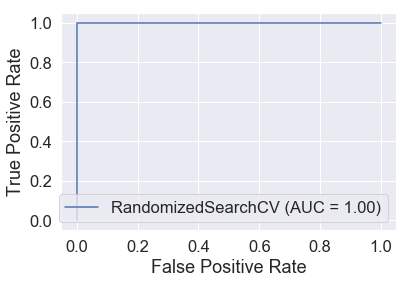

In [83]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_rf, X_test, y_test);

In [84]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[3614    0]
 [   0  505]]


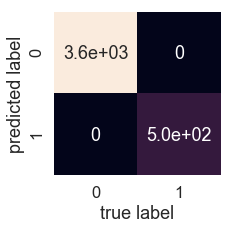

In [85]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [86]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      1.00      1.00       505

    accuracy                           1.00      4119
   macro avg       1.00      1.00      1.00      4119
weighted avg       1.00      1.00      1.00      4119



### Conclusion
The main objective of this project is to build a model that predicts customers that would subscribe to a bank term deposit, and we were able to achieve that by considering three different models and using the best one for the prediction. We also went through rigorous steps of preparing our data for the model and choosing various evaluation metrics to measure the performance of our models.